In [1]:
import matplotlib.pyplot as plt
import nilearn.plotting
import nibabel as nib
import glob


/home/david/anaconda3/envs/torchfmri/lib/python3.13/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
# baseline = "/media/conda2/public/sensory/derivatives/fsl/lefthand_fwhm-0.nii.gz"
# background = "/media/conda2/public/sensory/cache/fmriprep/.cache/templateflow/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-01_T1w.nii.gz"
subject = "01"
baseline = f"/media/conda2/public/sensory/derivatives/fsl_gaussian/sub-{subject}/func/sub-{subject}_task-lefthand_run-1_space-T1w_desc-preproc_bold_fwhm-0.feat/stats/zstat1.nii.gz"
background = f"/media/conda2/public/sensory/derivatives/fmriprep/sub-{subject}/anat/sub-{subject}_desc-preproc_T1w.nii.gz"

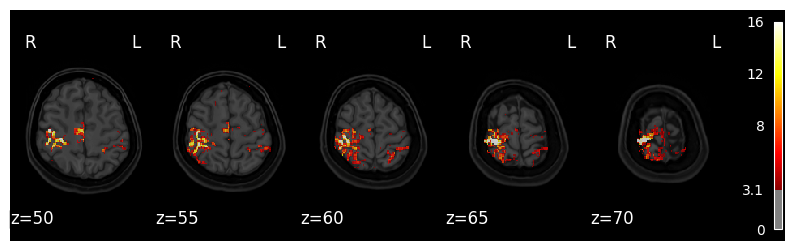

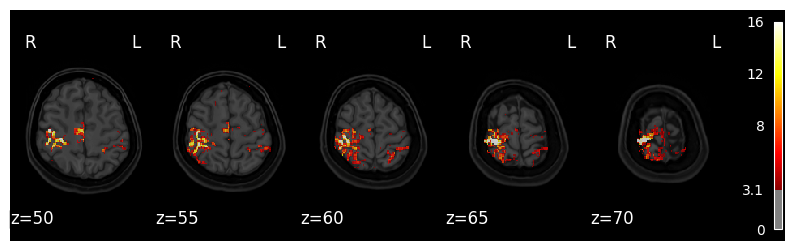

In [3]:
fig, ax = plt.subplots(figsize=(10, 3))
kwargs = dict(threshold = 3.1,
              alpha = 0.75,
              display_mode = "z",
              radiological = True,
              bg_img=background,
              draw_cross=False,
              vmin=0,
              vmax=16,
              symmetric_cbar=False,
              cmap="hot")

nilearn.plotting.plot_stat_map(baseline, axes=ax, cut_coords=(50, 55, 60, 65, 70),
               **kwargs)
fig

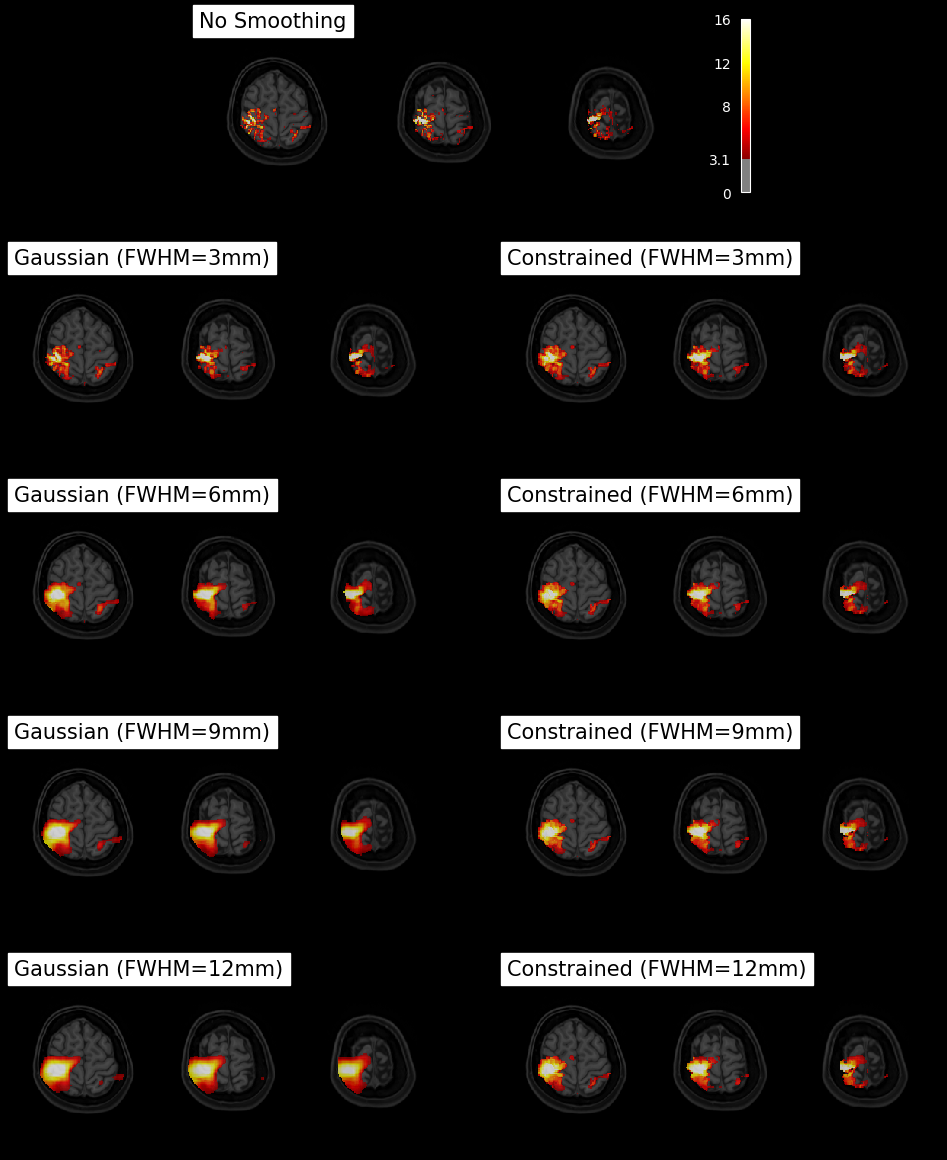

In [6]:
kwargs = dict(threshold = 3.1,
              alpha = 0.75,
              display_mode = "z",
              radiological = True,
              bg_img=background,
              draw_cross=False,
              vmin=0,
              vmax=16,
              symmetric_cbar=False,
              cmap="hot")

fig, axes = plt.subplot_mosaic([[".", "no_smoothing", "no_smoothing", "."],
                                ["gauss_3", "gauss_3", "const_3", "const_3"],
                                ["gauss_6", "gauss_6", "const_6", "const_6"],
                                ["gauss_9", "gauss_9", "const_9", "const_9"],
                                ["gauss_12", "gauss_12", "const_12", "const_12"]],
                               figsize=(10, 12),
                               height_ratios=[1, 1, 1, 1, 1],
                               width_ratios=[0.5, 1, 1, 0.5],)
fig.subplots_adjust(hspace=0., wspace=0.)
fig.tight_layout()
fig.patch.set_facecolor('black')

nilearn.plotting.plot_stat_map(baseline, 
                               axes=axes["no_smoothing"],
                               cut_coords=(60, 65, 70),
                               title="No Smoothing", 
                               annotate=False,
                               **kwargs)

# gauss_3 = "/media/conda2/public/sensory/derivatives/fsl/lefthand_fwhm-3.nii.gz"
# gauss_6 = "/media/conda2/public/sensory/derivatives/fsl/lefthand_fwhm-6.nii.gz"
# gauss_9 = "/media/conda2/public/sensory/derivatives/fsl/lefthand_fwhm-9.nii.gz"
# gauss_12 = "/media/conda2/public/sensory/derivatives/fsl/lefthand_fwhm-12.nii.gz"
gauss_3 = f"/media/conda2/public/sensory/derivatives/fsl_gaussian/sub-{subject}/func/sub-{subject}_task-lefthand_run-1_space-T1w_desc-preproc_bold_fwhm-3.feat/stats/zstat1.nii.gz"
gauss_6 = f"/media/conda2/public/sensory/derivatives/fsl_gaussian/sub-{subject}/func/sub-{subject}_task-lefthand_run-1_space-T1w_desc-preproc_bold_fwhm-6.feat/stats/zstat1.nii.gz"
gauss_9 = f"/media/conda2/public/sensory/derivatives/fsl_gaussian/sub-{subject}/func/sub-{subject}_task-lefthand_run-1_space-T1w_desc-preproc_bold_fwhm-9.feat/stats/zstat1.nii.gz"
gauss_12 = f"/media/conda2/public/sensory/derivatives/fsl_gaussian/sub-{subject}/func/sub-{subject}_task-lefthand_run-1_space-T1w_desc-preproc_bold_fwhm-12.feat/stats/zstat1.nii.gz"


for ax, image_file, title in zip((axes["gauss_3"],
                            axes["gauss_6"],
                            axes["gauss_9"],
                            axes["gauss_12"]),
                        (gauss_3,
                         gauss_6,
                         gauss_9,
                         gauss_12),
                        ("Gaussian (FWHM=3mm)",
                            "Gaussian (FWHM=6mm)",
                            "Gaussian (FWHM=9mm)",
                            "Gaussian (FWHM=12mm)")):
    nilearn.plotting.plot_stat_map(image_file, axes=ax, cut_coords=(60, 65, 70), colorbar=False,
                                   annotate=False, title=title,
                                   **kwargs)

# const_3 = "/media/conda2/public/sensory/derivatives/fsl/lefthand_tau-2.00.nii.gz"
# const_6 = "/media/conda2/public/sensory/derivatives/fsl/lefthand_tau-6.00.nii.gz"
# const_9 = "/media/conda2/public/sensory/derivatives/fsl/lefthand_tau-10.00.nii.gz"
# const_12 = "/media/conda2/public/sensory/derivatives/fsl/lefthand_tau-14.00.nii.gz"
const_3 = f"/media/conda2/public/sensory/derivatives/fsl_constrained/sub-{subject}/func/sub-{subject}_task-lefthand_run-1_space-T1w_desc-csmooth_fwhm-3_bold.feat/stats/zstat1.nii.gz"
const_6 = f"/media/conda2/public/sensory/derivatives/fsl_constrained/sub-{subject}/func/sub-{subject}_task-lefthand_run-1_space-T1w_desc-csmooth_fwhm-6_bold.feat/stats/zstat1.nii.gz"
const_9 = f"/media/conda2/public/sensory/derivatives/fsl_constrained/sub-{subject}/func/sub-{subject}_task-lefthand_run-1_space-T1w_desc-csmooth_fwhm-9_bold.feat/stats/zstat1.nii.gz"
const_12 = f"/media/conda2/public/sensory/derivatives/fsl_constrained/sub-{subject}/func/sub-{subject}_task-lefthand_run-1_space-T1w_desc-csmooth_fwhm-12_bold.feat/stats/zstat1.nii.gz"


for ax, image_file, title in zip((axes["const_3"], axes["const_6"], axes["const_9"], axes["const_12"]),
                        (const_3, const_6, const_9, const_12),
                        ("Constrained (FWHM=3mm)",
                         "Constrained (FWHM=6mm)",
                            "Constrained (FWHM=9mm)",
                            "Constrained (FWHM=12mm)")):
    nilearn.plotting.plot_stat_map(image_file, axes=ax, cut_coords=(60, 65, 70), colorbar=False,
                                   annotate=False, title=title,
                                   **kwargs)

fig
fig.savefig("sensory_gauss_const_comparison_10_12.png", bbox_inches="tight", dpi=300)

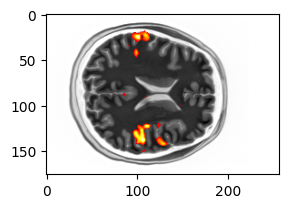

In [46]:
def plot_stat_map(image_file, anatomical_file, surface_files, cut_coord, ax,
                  title=None, threshold=3.1, cmap="hot", alpha=0.75):
    """
    Plot a statistical map on top of an anatomical image and surfaces.
    :param image_file: Statistical map file path (NIFTI).
    :param anatomical_file: T1w anatomical image file path (NIFTI).
    :param surface_files: Surface files (list of GIFTI).
    :param cut_coords: cut coordinates for the plot.
    :param title: Title for the plot.
    :return:
    """
    # ax.set_title(title, fontsize=16, color='white')
    anatomical_img = nib.load(anatomical_file)

    # resample the statistical map to the anatomical image space
    stat_img = nib.load(image_file)
    stat_img_resampled = nilearn.image.resample_to_img(stat_img, anatomical_img,
                                                       interpolation='linear',
                                                       force_resample=True,
                                                       copy_header=True)
    anat_2d = anatomical_img.get_fdata()[..., cut_coord]
    stat_2d = stat_img_resampled.get_fdata()[..., cut_coord]

    stat_mask = stat_2d > threshold  # Create a mask for the statistical map
    stat_2d[~stat_mask] = 0  # Apply threshold
    # apply colormap
    cmap = plt.get_cmap(cmap)
    norm = plt.Normalize(vmin=stat_2d.min(), vmax=stat_2d.max())
    colored_stat = cmap(norm(stat_2d))

    # apply grayscale to  anatomical image
    anat_cmap = plt.get_cmap('gray_r')
    norm_gray = plt.Normalize(vmin=anat_2d.min(), vmax=anat_2d.max())
    gray_anat = anat_cmap(norm_gray(anat_2d))
    # ax.imshow(gray_anat)
    # combine the two images
    combined_image = gray_anat.copy()
    combined_image[stat_mask] = colored_stat[stat_mask]
    ax.imshow(combined_image)


fig, ax = plt.subplots(figsize=(3, 3))
plot_stat_map(gauss_3, background, None, 180, ax, cmap="hot")